<a href="https://colab.research.google.com/github/nildodnjunior/mestrado_comp_ifes_ml/blob/master/kmeans_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [24]:
data = load_iris()
X, y = data.data[:,2:4], data.target

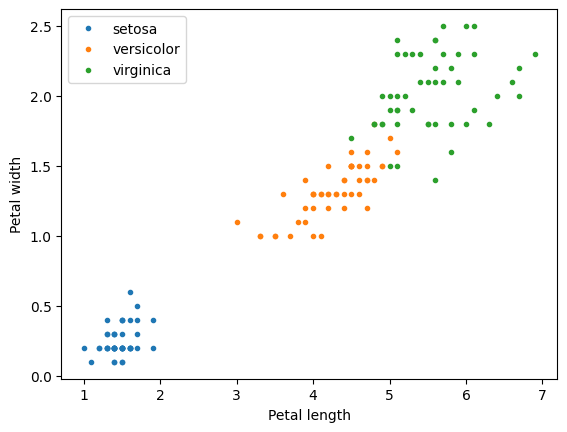

In [25]:
for i in range(len(set(y))):
    plt.plot(X[y==i, 0], X[y==i, 1], '.', label=data.target_names[i])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

In [73]:
#Calculando um modelo usando KNN
modelo = KNeighborsClassifier()
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.4, random_state=42)

modelo.fit(Xtr, ytr)
print(f'Acurácia para o KNN: {accuracy_score(yte, modelo.predict(Xte))}')

Acurácia para o KNN: 0.9833333333333333


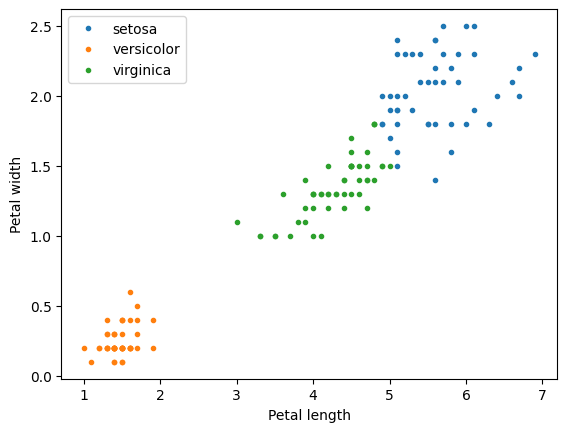

Acurácia para o KMeans: 0.96


In [72]:
#Fazendo a predição usando KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)

ypred = kmeans.fit_predict(X)

for i in range(len(set(ypred))):
    plt.plot(X[ypred==i, 0], X[ypred==i, 1], '.', label=data.target_names[i])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

#Como o y do iris dataset é ordenado e o KMeans não retorna um array na mesma ordem,
#a acurácia sempre dava um valor muito baixo. Com isso, fiz essa repetição para
#que os valores fiquem na mesma "ordem".
ypred2=np.zeros(y.shape, dtype=np.int32)
for k, v in enumerate(ypred):
    if v == 1:
        ypred2[k] = 0
    elif v == 2:
        ypred2[k] = 1
    elif v == 0:
        ypred2[k] = 2

print(f'Acurácia para o KMeans: {accuracy_score(y, ypred2)}')

Pode-se perceber que a acurácia ficou bem alta, mas ainda um pouco menor que o KNN. A semelhança pode ser percebida pelos gráficos, onde pode-se perceber que somente alguns pontos ficaram diferentes do original acima.